### Importing libraries and creating dataframe of our data

In [1]:
#Importing libraries and reading the csv file containing our data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\Wamika\Desktop\Data Science MS\SEM1\Learning from data\Digit recogniser\Digit_Recogniser.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


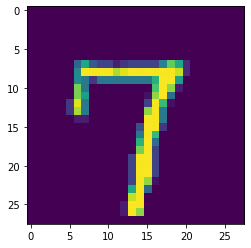

In [2]:
#visualising our dataset using matplotlib
#Take any one row for example row 6
image0 = df.iloc[6,1:]
image0                                                
plt.imshow(np.array(image0).reshape(28,28))

### Splitting data into train and test

In [3]:
#Creating train and test data. We are doing in standard 70:30 ratio
x = df.iloc[:,1:]
y = df.iloc[:,0]
from sklearn.model_selection import train_test_split
xtrain , xtest ,ytrain, ytest = train_test_split(x,y,test_size =0.3,shuffle = False,random_state =7)
#Check Dimensions
print('Training Features Shape:', xtrain.shape)
print('Training Labels Shape:', ytrain.shape)
print('Testing Features Shape:', xtest.shape)
print('Testing Labels Shape:', ytest.shape)

Training Features Shape: (29400, 784)
Training Labels Shape: (29400,)
Testing Features Shape: (12600, 784)
Testing Labels Shape: (12600,)


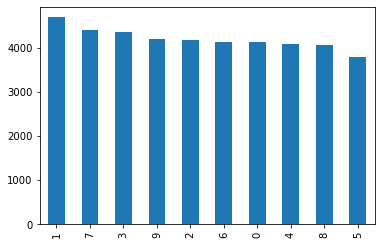

In [4]:
#Plotting bar chart of occurences of each digit in dataset
df['label'].value_counts().plot.bar()

In [5]:
#Printing maximum and minimum digits of occurences
print("Number of 1: {}".format(len(df[df['label'] == 1])))
print("Number of 5: {}".format(len(df[df['label'] == 5])))

Number of 1: 4684
Number of 5: 3795


### Now we fit models like Random Forest, Decision Tree, K Nearest Neighbours and Neural Networks
### And experiment with parameters 

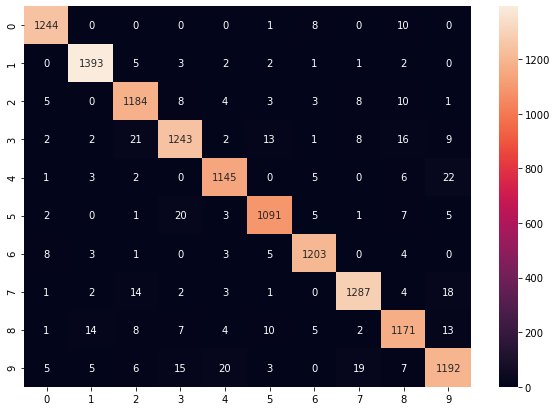

In [6]:
#Random Forest 
#Default number of decision trees in Random Forest are 100
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(xtrain , ytrain)

#using seaborn library for better visualization of confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
ypred_rf = random_forest.predict(xtest)
random_forest = confusion_matrix(ytest,ypred_rf)
plt.figure(figsize=(10,7))
sns.heatmap(random_forest, annot=True, fmt='d')

#Predict Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(ypred_rf,ytest)

In [7]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier 
dtree = DecisionTreeClassifier()
dtree = dtree.fit(xtrain , ytrain)
ypred_dt = dtree.predict(xtest)
score2 = accuracy_score(ypred_dt,ytest)

In [8]:
#Experimenting with decision tree parameters
dtree_1 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1)
dtree_1 = dtree_1.fit(xtrain , ytrain)
new_ypred_dt = dtree_1.predict(xtest)
new_score_1 = accuracy_score(new_ypred_dt,ytest)
new_score_1

0.8491269841269842

In [9]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn = knn.fit(xtrain ,ytrain)
ypred_knn = knn.predict(xtest)
score3 = accuracy_score(ypred_knn,ytest)

In [10]:
#Experimenting with KNN parameters
knn_1 = KNeighborsClassifier(n_neighbors = 10,metric='euclidean')
knn_1 = knn_1.fit(xtrain ,ytrain)
new_ypred_knn = knn_1.predict(xtest)
new_score_2 = accuracy_score(new_ypred_knn,ytest)
new_score_2

0.9621428571428572

In [11]:
#NN
from sklearn.neural_network import MLPClassifier
model_NN = MLPClassifier()
model_NN = model_NN.fit(xtrain,ytrain)
ypred_nn = model_NN.predict(xtest)
score4 = accuracy_score(ypred_nn,ytest)

In [12]:
#Experimenting with NN parameters
model_NN_1 = MLPClassifier(hidden_layer_sizes=(100,30))
model_NN_1 = model_NN_1.fit(xtrain,ytrain)
new_ypred_nn = model_NN_1.predict(xtest)
new_score_3 = accuracy_score(new_ypred_nn,ytest)
new_score_3

0.965

### We check the accuracy score of each model

In [13]:
print('Accuracy with random forest is:', score1)
print('Accuracy with Decision Tree is:', score2)
print('Accuracy with KNN is:', score3)
print('Accuracy with NN is:', score4)

scores=[score1,score2,score3,score4]
print(scores)
indx=['RF','DT','KNN','NN']

df = pd.DataFrame(data = scores,index=indx, columns=['Accuracy'])
df

Accuracy with random forest is: 0.9645238095238096
Accuracy with Decision Tree is: 0.848015873015873
Accuracy with KNN is: 0.9655555555555555
Accuracy with NN is: 0.946984126984127
[0.9645238095238096, 0.848015873015873, 0.9655555555555555, 0.946984126984127]


,Accuracy
RF,0.964524
DT,0.848016
KNN,0.965556
NN,0.946984


In [14]:
#Plot Graph to compare accuracy scores
scores=[score1,score2,score3,score4]
print(scores)
indx=['RF','DT','KNN','NN']
N_Par = [0,1,2,3]
Accuracy_Rate = [score1,score2,score3,score4]

[0.9645238095238096, 0.848015873015873, 0.9655555555555555, 0.946984126984127]


Text(0.5, 1.0, 'Comparing Accuracies')

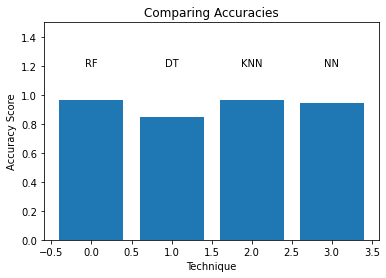

In [15]:
plt.bar(N_Par, Accuracy_Rate, align='center')

for i in N_Par:
    plt.text(N_Par[i], 1.2, indx[i],horizontalalignment='center')

plt.xlabel('Technique')

plt.ylim([0,1.5])
plt.ylabel('Accuracy Score') 

plt.title('Comparing Accuracies')

### Taking in built Digits data in python and using K-Means Clustering Algorithm

In [16]:
#K Means clustering for the same handwritten digits data already present in sklearn datasets
import numpy as np
import sklearn
from sklearn.preprocessing import scale
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn import metrics

#Taking in built data
digits = load_digits()
data = scale(digits.data)
y = digits.target

#Defining values required for k-means
k = 10
samples, features = data.shape


def bench_k_means(estimator, name, data):
    estimator.fit(data)
    print('%-9s\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, estimator.inertia_,
             metrics.homogeneity_score(y, estimator.labels_),
             metrics.completeness_score(y, estimator.labels_),
             metrics.v_measure_score(y, estimator.labels_),
             metrics.adjusted_rand_score(y, estimator.labels_),
             metrics.adjusted_mutual_info_score(y,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean')))

clf = KMeans(n_clusters=k, init="random", n_init=10)
bench_k_means(clf, "1", data)

1        	69511	0.594	0.640	0.616	0.462	0.612	0.147


In [17]:
#IMporting all required libraries
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from keras.optimizers import Adam
#because of multiclass datasets
from keras.utils.np_utils import to_categorical 
import random

In [18]:
np.random.seed(0)
#import 6000 images from mnist data set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

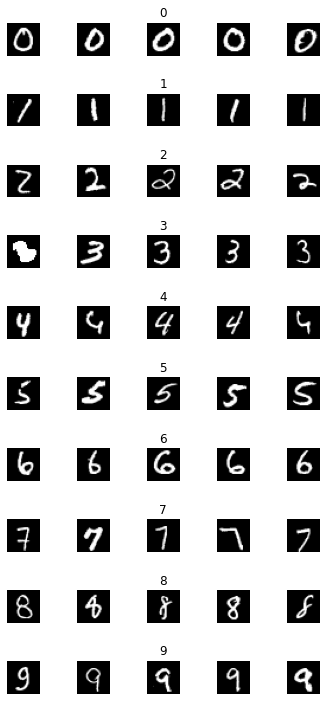

In [19]:
#Plotting a grid of all digits according to pixels data
num_of_samples = []

cols = 5
num_of_classes = 10

fig, axs = plt.subplots(nrows=num_of_classes, ncols=cols,
                       figsize=(5, 10))
fig.tight_layout()
for i in range(cols):
      for j in range(num_of_classes):
            x_selected = X_train[y_train == j]
            axs[j][i].imshow(x_selected[random.randint(0, len(x_selected -1)), :, :],cmap=plt.get_cmap('gray'))
            axs[j][i].axis("off")
            if i==2:
                  axs[j][i].set_title(str(j))
                  num_of_samples.append(len(x_selected))